## *Importando bibliotecas*

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np


# `Aula 1: Conhecendo o Matplotlib`

### 1.1 Conhecendo os Dados

In [ ]:
df = pd.read_csv(
    "arquivos/imigrantes_canada.csv",
    sep=","
)
df

In [ ]:
df.info()


##### Minha análise

In [ ]:
# Analisando tendências de imigração do Brasil 

# filtrando apenas o Brasil
imigracao_br = df.query("País == 'Brasil'")

# filtrando apenas as colunas e linhas desejadas. Também estou resentando o index aqui
imigracao_br = imigracao_br.iloc[0, 3:37].reset_index()

# Dando nome às colunas
imigracao_br.columns = ["Ano", "No_Imigrantes"]

# plotando gráfico
plt.figure(
    figsize=(15, 5),
    constrained_layout=True
)
sns.lineplot(
    data=imigracao_br,
    x='Ano',
    y='No_Imigrantes'
)



##### Análise do curso

In [ ]:
# Definindo a coluna "País" como index do DataFrame
df_1 = df.set_index("País")

# Criando uma lista com as respectivas colunas dos anos que aparecem no DataFrame
anos = list(map(str, range(1980, 2014)))

# Criando uma Series que contenha as informações das colunas com anos do DataFrame
brasil = df_1.loc['Brasil', anos].to_frame().reset_index()
brasil.columns = ["ano", "imigrantes"]
brasil

### 1.2 Criando o Primeiro Gráfico com Matplotlib

In [ ]:

# Configura o tamanho da figura e ajusta automaticamente o layout
plt.figure(
    figsize=(12, 5),            # Define o tamanho da figura (largura x altura)
    constrained_layout=True     # Ajusta automaticamente os elementos do layout para evitar sobreposição
)

# Títulos do gráfico
plt.title("Imigração Brasil-Canadá")
plt.xlabel("Ano")
plt.ylabel("Número de Imigrantes")

# Plota os dados de imigração ao longo dos anos
plt.plot(
    brasil['ano'],              # Dados para o eixo x (anos)
    brasil['imigrantes'],       # Dados para o eixo y (número de imigrantes)
    color='red',                # Define a cor da linha como vermelha
    linewidth=1.5,              # Define a espessura da linha
    alpha=0.5,                  # Define a transparência da linha (50% opaco)
    linestyle='-',              # Define o estilo da linha como sólida
    marker='o'                  # Define o marcador de pontos como círculos
)

# Configura os rótulos do eixo x
plt.xticks(
    ticks=brasil['ano'],        # Define as posições dos rótulos no eixo x
    rotation=60                 # Rotaciona os rótulos do eixo x em 30 graus para melhor legibilidade
)

# Adiciona uma grade ao gráfico para facilitar a visualização dos dados
plt.grid(True)

# Exibe o gráfico na tela
plt.show()


### 1.3 Imigrantes Brasil x Argentina para o Canadá

##### Minha solução

In [ ]:
imigracao_br_ar = df.query("País == 'Brasil' or País == 'Argentina'")

imigracao_br_ar = imigracao_br_ar.iloc[0:2, 3:37].T.reset_index()

imigracao_br_ar.columns = ['Ano', 'Argentina', 'Brasil']

plt.figure(
    figsize=(12, 6),
    constrained_layout=True
)

plt.title("Imigração Brasil-Argentina para o Canadá")
plt.xlabel("Ano")
plt.ylabel("Número de Imigrantes")

plt.grid(True)

sns.lineplot(
    imigracao_br_ar,
    x='Ano',
    y='Argentina',
    label='Argentina',
    marker='o'
)
sns.lineplot(
    imigracao_br_ar,
    x='Ano',
    y='Brasil',
    label='Brasil',
    marker='o'
)

plt.xticks(
    ticks=imigracao_br_ar['Ano'],
    rotation=60
)

plt.show()


##### Resolução do curso

In [ ]:
# Extraindo apenas as informações referentes ao Brasil e Argentina
df_comparacao = df_1.loc[['Brasil', 'Argentina'], anos]
df_comparacao = df_comparacao.T.reset_index()
df_comparacao.columns = ['anos', 'brasil', 'argentina']
df_comparacao

plt.figure(
    figsize=(12, 6),
    constrained_layout=True,
)

plt.title("Imigração Brasil/Argentina para o Canadá")
plt.xlabel("Anos")
plt.ylabel("Número de Imigrantes")

plt.xticks(rotation=60)
plt.yticks(ticks=list(range(250, 3000, 250)))

plt.grid(
    axis='x'
)

plt.plot(
    df_comparacao['anos'],
    df_comparacao['brasil'],
    label='Brasil'
)
plt.plot(
    df_comparacao['anos'],
    df_comparacao['argentina'],
    label='Argentina'
)

plt.legend()
plt.show()


# `Aula 2: Criando figuras com Matplotlib`

### 2.1 Criando uma figura

In [ ]:
fig, axs = plt.subplots(figsize=(10, 5))

axs.plot(
    imigracao_br['Ano'],
    imigracao_br['No_Imigrantes']
)

axs.set_title("Imigração do Brasil para o Canadá\n1980 - 2013")

axs.xaxis.set_major_locator(plt.MultipleLocator(5))
axs.set_xlabel("Ano")
axs.set_ylabel("Número de Imigrantes")

plt.show()


### 2.2 Criando subplots em duas direções

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

anos = [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2013]

axs[0].plot(
    imigracao_br_ar['Ano'].astype(int),
    imigracao_br_ar['Brasil']
)
axs[0].set_xticks(anos)
axs[0].set_title("Imigração do Brasil para o Canadá\n1980 - 2013")
axs[0].set_xlabel("Ano")
axs[0].set_ylabel("Número de Imigrantes")
axs[0].grid()

axs[1].plot(
    imigracao_br_ar['Ano'].astype(int),
    imigracao_br_ar['Argentina']
)
axs[1].set_xticks(anos)
axs[1].set_title("Imigração do Argentina para o Canadá\n1980 - 2013")
axs[1].set_xlabel("Ano")
axs[1].set_ylabel("Número de Imigrantes")
axs[1].grid()

plt.tight_layout()

plt.show()

### 2.3 Criando Subplots em Quatro direções

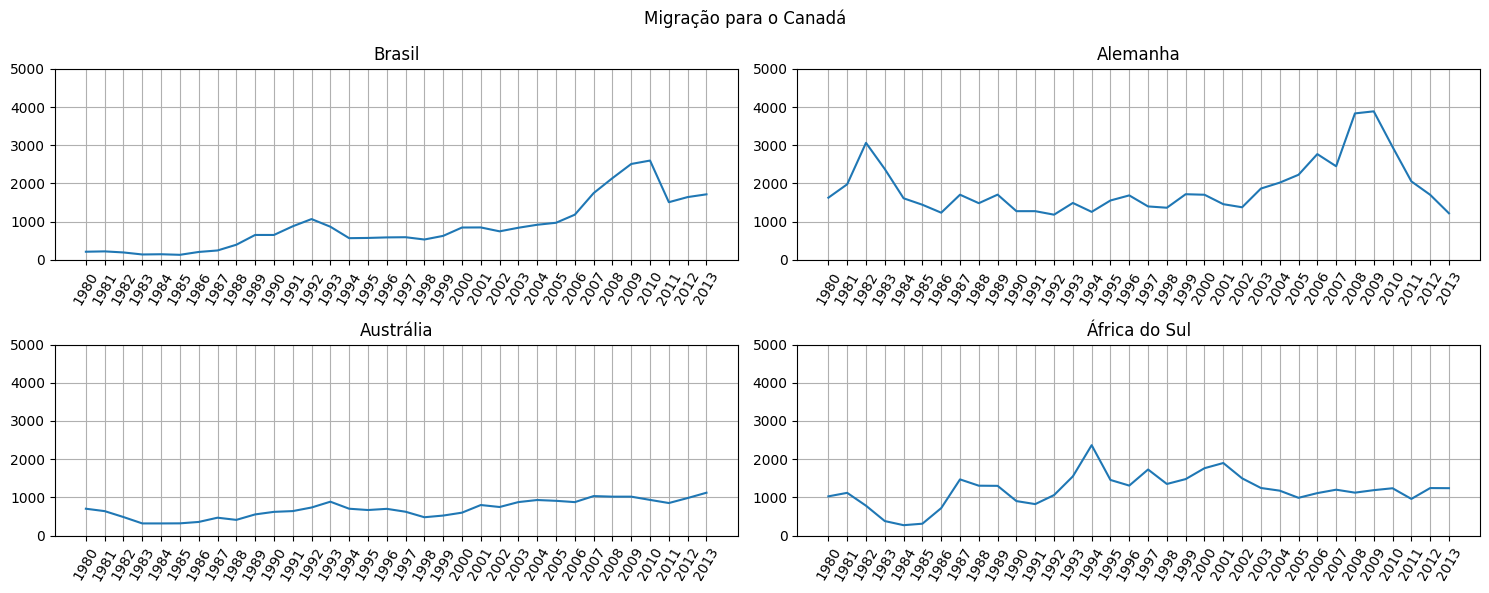

In [62]:
anos = list(map(str, range(1980, 2014)))

fig, axs = plt.subplots(2, 2, figsize=(15, 6))
fig.suptitle("Migração para o Canadá")

axs[0, 0].plot(df_1.loc["Brasil", anos])
axs[0, 0].set_title("Brasil")

axs[0, 1].plot(df_1.loc['Alemanha', anos])
axs[0, 1].set_title("Alemanha")

axs[1, 0].plot(df_1.loc['Austrália', anos])
axs[1, 0].set_title("Austrália")

axs[1, 1].plot(df_1.loc['África do Sul', anos])
axs[1, 1].set_title("África do Sul")

for ax in axs.flat:
    ax.set_xticks(anos)
    ax.set_xticklabels(anos, rotation=60)
    ax.grid()

for ax in axs.flat:
    ax.set_ylim(0, 5000)

fig.tight_layout()
plt.show()
